## Linear methods for regression and classification
In this jupyter notebook, we will practice the topics covered in the lectures. Specially, we will do hands-on practice of:
- load and prepare data for machine learning model training and testing
- train and test linear models (linear regression (lasso/ridge), polynomial regression, and logistic regression)
- compare and understand model performance 

For implementations that have fixed results, we provide running examples for your reference. *You might get slightly different results due to the sklearn version you are using, just leave a comment to indicate your version where you get different results.*<br>

## Linear Regression and Polynomial Regression
In this section, we will explore the diabetes dataset:
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes <br>

This dataset contains n = 442 diabetes patients' information of ten variables: age, sex, body mass index, average blood pressure, and six blood serum measurements. Each patient has a quantitative value of disease progression one year after baseline.


We will fit different regression models to analyze this dataset: 
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target variable <br>
    
2. Prepare data for model training and testing <br>

3. Fit different regression models (linear/lasso/ridge) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

**Note:** please always add comments to explain your observations/findings

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
# there are different ways to load the dataset, please make sure you understand the mechanism
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
data = load_diabetes(as_frame=True)

### Basic dataset exploration 

In [4]:
data.data.shape, data.target.shape

((442, 10), (442,))

In [5]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
data.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [7]:
np.round(data.frame.describe(),3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


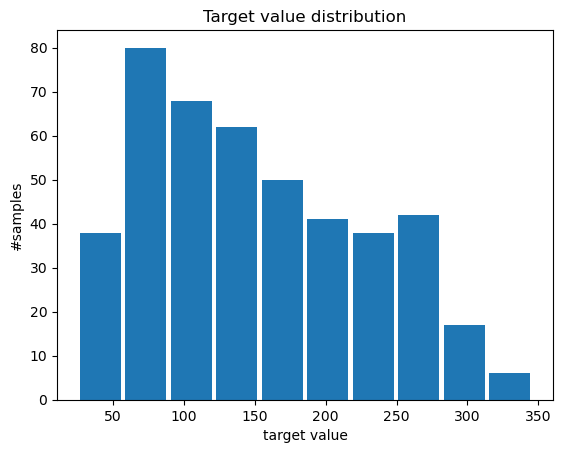

In [8]:
# plot a histogram to visualize the distribution of the "target" value
plt.hist(data.frame['target'], rwidth=0.9)
plt.title("Target value distribution")
plt.xlabel("target value")
plt.ylabel("#samples");

### Prepare data for model training and testing

In [9]:
# Split the data into 70% training and 30% testing
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Remember to set random_state to control for the randomness

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [10]:
# check feature matrix
X_train.shape, X_test.shape

((309, 10), (133, 10))

### Fit the linear regression model on the training set and evaluate model performance on the testing set 
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [54]:
reg = LinearRegression() # check the documentation to understand the default parameters
reg.fit(X_train, y_train)
reg_score = reg.score(X_test, y_test)
reg_score = np.round(reg_score,3)
reg_score

0.477

**Interpret model coefficients and intercept**

In [48]:
linear_coef = list(np.round(reg.coef_,3))
linear_coef

[29.254,
 -261.706,
 546.3,
 388.398,
 -901.96,
 506.763,
 121.154,
 288.035,
 659.269,
 41.377]

In [35]:
linear_int = np.round(reg.intercept_,3)
linear_int

151.008

**Your task**: write down the linear regression model with the above coefficients and intercept

Y(target) = 29.254 * age + -261.706 * sex + 546.3 * bmi + 388.398 * bp + -901.96 *s1 + 506.763 * s2 + 121.154 * s3 + 288.035 * s4 + 659.269 * s5 + 41.377 * s6 + 151.008


**Your task**: explore other parameters/attributes/methods
- fit_intercept
- feature_names_in_, n_features_in_
Write your exploration code and results below

In [69]:
reg.fit_intercept

True

In [68]:
reg.n_features_in_

10

In [70]:
reg.feature_names_in_

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
      dtype=object)

#### Discussion: explore parameters
- The fit_intercept parameter is default as True, which tells the model to calculate the intercept for this model. If set this as False, no intercept will be used in calculations.
- The feature_names_in tells the names of the features seen during the fit. 
- The n_features_in tells numbers of features seen during the fit.

### Fit and evaluate a Ridge regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [55]:
# Fit model
rg_reg = Ridge()
rg_reg.fit(X_train, y_train)
# Evaluate model performance
rg_reg_score = rg_reg.score(X_test, y_test)
rg_reg_score = np.round(rg_reg_score,3)
rg_reg_score

0.423

In [56]:
# Interpret model coefficients
rg_reg_coef = list(np.round(rg_reg.coef_,3))
rg_reg_coef

[45.054,
 -71.947,
 280.716,
 195.213,
 -2.229,
 -17.541,
 -148.689,
 120.467,
 198.614,
 106.935]

In [58]:
# Interpret model intercept
rg_reg_int = np.round(rg_reg.intercept_,3)
rg_reg_int

151.867

### Your task: fit and evaluate a Lasso regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [57]:
# Fit model
rg_lasso = Lasso()
rg_lasso.fit(X_train, y_train)
# Evaluate model performance
rg_lasso_score = rg_lasso.score(X_test,y_test)
rg_lasso_score = np.round(rg_lasso_score,3)
rg_lasso_score


0.362

In [50]:
# Interpret model coefficients 
lasso_coef = list(np.round(rg_lasso.coef_,3))
lasso_coef

[0.0, -0.0, 443.703, 51.601, 0.0, 0.0, -0.0, 0.0, 201.966, 0.0]

In [40]:
# Interpret model intercept
lasso_int = np.round(rg_lasso.intercept_,3)
lasso_int

152.166

### Your task: compare the linear/ridge/lasso regression models
- write down your code to create and display the given dataframe

In [103]:
# hint: the following dataframe shows the expected way to organize and display the information
# make sure to: 
# - round to 3 digits after the decimal point
# - rename the column names 
# - include intercept and score in the last two rows
compare = pd.DataFrame({'linear': linear_coef, 'ridge': rg_reg_coef, 'lasso': lasso_coef})
compare.index = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
intercept = [linear_int, rg_reg_int, lasso_int]
compare.loc['intercept'] = intercept
score = [reg_score,rg_reg_score,rg_lasso_score]
compare.loc['score'] = score
compare


,linear,ridge,lasso
age,29.254,45.054,0.000
sex,-261.706,-71.947,-0.000
bmi,546.300,280.716,443.703
bp,388.398,195.213,51.601
s1,-901.960,-2.229,0.000
s2,506.763,-17.541,0.000
s3,121.154,-148.689,-0.000
s4,288.035,120.467,0.000
s5,659.269,198.614,201.966
s6,41.377,106.935,0.000


**Your observations and thoughts of comparing the three models**
- hint: connect this with what we discussed in the lectures, e.g.
    - how does regularization affect coefficients and model performance 
    - what is the difference between ridge (L2 penalty) and Lasso (L1 penalty) 

#### Discussion
- The performance scores for ridge and lasso regularization decreased compared to the original linear model. Most coefficients for ridge have decreased, except for features age, s3, and s6. However, for features originally have very large coefficients, ridge penalized their weights very much, such as sex and s2. All coefficients for lasso have decreased, some of them reached zero, which shows that lasso penalized weight in a different way than ridge. The intercept for all three methods are almost the same, which shows that regularization tend to keep the intercept, which constrain bias. 
- One distinct difference between ridge and lasso is the impact they cause to coefficients. Ridge tend to emphasize to penalize large weights, but no coefficients will reach a real 0. However, lasso can penalize coefficients to a solid zero, by which we can use this method to cut off the features that we do not want to include in the model fitting.

## Polynomial regression
- Use the diabetes data with the same train and test set to fit several **Polynomial regression** models 
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

### Fit a polynomail regression model with degree=2

In [72]:
# generate the new polynomial feature matrix for the training data 
# "fit_transform" on the original training data

poly2 = PolynomialFeatures(2)
X_train_poly2 = poly2.fit_transform(X_train)
X_train_poly2.shape

(309, 66)

In [73]:
# generate the new polynomial feature matrix for the testing data 
# only do "transform" on the original testing feature matrix
# why do we do "fit_transform" on training data but only do "transform" on testing data?

X_test_poly2 = poly2.transform(X_test)
X_test_poly2.shape

(133, 66)

In [89]:
# fit a regression model with the newly generated polynomial feature matrix 
# evaluate model performance 

poly2_reg = LinearRegression()
poly2_reg.fit(X_train_poly2, y_train)
poly2_score = poly2_reg.score(X_test_poly2, y_test)
poly2_score = np.round(poly2_score,3)
poly2_score

0.413

In [92]:
# get intercept
intercept2 = np.round(poly2_reg.intercept_,3)
intercept2

-360.919

### Your task: fit a polynomail regression model with degree=1
- Follow the previous steps of fitting a polynomial regression model with degree=2 to **fit a new model with degree=1** (name it as $poly1\_reg$)

In [75]:
# generate the new polynomial feature matrix for the training data, degree=1
# "fit_transform" on the original training data

poly1_reg = PolynomialFeatures(1)
X_train_poly1 = poly1_reg.fit_transform(X_train)
X_train_poly1.shape

(309, 11)

In [76]:
# generate the new polynomial feature matrix for the testing data 
# only do "transform" on the original testing feature matrix
# why do we do "fit_transform" on training data but only do "transform" on testing data?

X_test_poly1 = poly1_reg.transform(X_test)
X_test_poly1.shape

(133, 11)

In [87]:
# fit a regression model with the newly generated polynomial feature matrix 
# evaluate model performance 

poly1_reg = LinearRegression()
poly1_reg.fit(X_train_poly1, y_train)
poly1_score = poly1_reg.score(X_test_poly1, y_test)
poly1_score = np.round(poly1_score,3)
poly1_score

0.477

In [88]:
# get intercept
intercept1 = np.round(poly1_reg.intercept_,3)
intercept1

151.008

### Your task: fit a polynomail regression model with degree=3
- Follow the previous steps of fitting a polynomial regression model with degree=2 to **fit a new model with degree=3** (name it as $poly3\_reg$)

In [105]:
# generate the new polynomial feature matrix for the training data, degree=3
# "fit_transform" on the original training data
poly3_reg = PolynomialFeatures(3)
X_train_poly3 = poly3_reg.fit_transform(X_train)
X_train_poly3.shape

(309, 286)

In [106]:
# generate the new polynomial feature matrix for the testing data 
X_test_poly3 = poly3_reg.transform(X_test)
X_test_poly3.shape

(133, 286)

In [109]:
# fit a regression model with the newly generated polynomial feature matrix 
# evaluate model performance 
poly3_reg = LinearRegression()
poly3_reg.fit(X_train_poly3, y_train)
poly3_score = poly3_reg.score(X_test_poly3, y_test)
poly3_score = np.round(poly3_score,3)
poly3_score

-92.136

In [91]:
# get intercept
intercept3 = np.round(poly3_reg.intercept_,3)
format(intercept3, 'f')

'23716369301102580.000000'

### Your task: compare the polynomial regression models with degree=1/2/3 and the original linear regression model
- please write code to create and display the given data frame

In [104]:
compare_degree = pd.DataFrame(columns=['linear', 'poly_d1', 'poly_d2', 'poly_d3'])
compare_degree.loc['intercept'] = [linear_int, intercept1, intercept2, intercept3]
compare_degree.loc['score'] = [reg_score, poly1_score,poly2_score, poly3_score]
compare_degree

,linear,poly_d1,poly_d2,poly_d3
intercept,151.008,151.008,-360.919,2.371637e+16
score,0.477,0.477,0.413,-9.213600e+01


### Your task: observations and thoughts of comparing the above four models
- hint: connect this with overfitting/underfitting we discussed in class

- When degree=1, the polynomial regression model is the same things as a linear regression model. 
- However, as degree increased, where we introduce the square of the features and their interactions. As the shape of X_trainging for degree=2/3 shows, the number of features used in fitting model has largely increased, which might introduce useless noise and captured accidentally by the model. The complexity of the model thus increased as well. 
- More complexity will largely increase the possibility of overfitting. The intercept when linear regression model (degree=3) is very huge compared to degree=1/2, which also indicate the model is overfitting. As the model performance scores show, the performance score for degree=2  decreased a little bit, whereas the performance score for degree=3 largely dropped to below zero, which proved that when model becomes too complex, its capacity to predict linear patterns decreases due to the overfitting.

### Your task: interpret the model performance wrt the task itself
- how does each feature relate with diabetes
- which factors contribute positively/negatively/most/least to diabetes
- does these statistical correlations make sense from biological perspective? 

- For features age, bmi, bp(average blood pressure), s2(ldl, low-density lipoproteins),s3(hdl, high-density lipoproteins),s4(tch, total cholesterol / HDL),s5(ltg, possibly log of serum triglycerides level), and s6(glu, blood sugar level) that have positive coefficients implied that these features have a positive correlation with the target variable. The increase in one of those features will result in an increased impact in the target variable.
- For features sex, s1(tc, total serum cholesterol) that have negative coefficients implied that these features have a negative correlation with the target variable. The increase or larger amount of these features is associated with a decrease in the target. However, since we do not know how the dataset encode 'sex' ( whether 1 for male or 1 for female), I am not sure how we can interpret result. If 1 represents male, this model suggests that being male is associated with a lower measure of diabetes progression compared to being female, or vice versa.
- The most contributing feature is the variable with the largest coefficients in absolute value, which is the s1, with the value of -901.96. Larger coefficients suggest more influence on the target variables.The least contributing feature is the variable with the least coefficients in the absolue value, which is the s6, with the value of 41.377. Variable with small coefficients have smaller influence on the target variable.
- It makes sense that bmi and bp have positive coefficients because high bmi and bp are known as risky factors for diabetes as well as many other diaseses. High blood pressure is also a risk factor for diabetes, which is consistent with its positive coefficient. For other features that indicate conditions of the blood, while high cholesterol levels (s1) are generally considered a risk factor for cardiovascular diseases, it has the lowest coefficients here, which suggestes a reverse prediction of diabetes. Although s6 (blood sugar) has a positive coefficient here, I image the value for it to be larger here, since elevated blood sugar level is used as a direct indicator of diabetes.

## Linear models for classification: LogisticRegression 
In this section, we will work on a banknote authentication dataset:
- Original data source: https://archive.ics.uci.edu/ml/datasets/banknote+authentication <br>

This dataset contains n = 1372 images of genuine and forged banknote-like specimens. Each image is represented by four features extracted from Wavelet Transform tool: 
    1. variance (continuous) 
    2. skewness (continuous)
    3. curtosis (continuous)
    4. entropy of image (continuous)

And each image has a binary label of 0/1 indicating whether the banknote is forged or genuine.

We will fit several logistic regression models with different parameter settings to analyze this dataset: 
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target values <br>
    
2. Prepare data for model training and testing <br>

3. Fit different logistic regression models (vary by parameter settings) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

In [110]:
import pickle
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [111]:
# please change to your file path
df_data = pickle.load(open('./banknote_authentication_dataframe.pickle','rb'))

### Basic dataset exploration

In [114]:
# display the dataset
df_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0.0
1,4.54590,8.16740,-2.4586,-1.46210,0.0
2,3.86600,-2.63830,1.9242,0.10645,0.0
3,3.45660,9.52280,-4.0112,-3.59440,0.0
4,0.32924,-4.45520,4.5718,-0.98880,0.0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1.0
1368,-1.38870,-4.87730,6.4774,0.34179,1.0
1369,-3.75030,-13.45860,17.5932,-2.77710,1.0
1370,-3.56370,-8.38270,12.3930,-1.28230,1.0


In [115]:
# describe the data 
df_data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Prepara data for model training and testing

In [116]:
feature_names = ['variance','skewness','curtosis','entropy']

# Construct feature matrix from the data frame
X_data = df_data[feature_names]
y_data = df_data['class']
X_data.shape, y_data.shape, Counter(y_data)

((1372, 4), (1372,), Counter({0.0: 762, 1.0: 610}))

In [117]:
# split the data into 70% training and 30% testing using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

### Fit LogisticRegression models with different parameter settings
- L1 VS L2 penalty
- C values (inverse of regularization strength)

In [118]:
clf = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', C=1.0).fit(X_train, y_train)

In [119]:
clf.score(X_test, y_test)

0.9878640776699029

In [120]:
clf.predict(X_test[:3])

array([0., 0., 0.])

In [121]:
np.round(clf.predict_proba(X_test[:3]),3)

array([[1.   , 0.   ],
       [0.982, 0.018],
       [0.996, 0.004]])

In [141]:
clf.coef_

array([[-3.85152883, -2.11687242, -2.58471858, -0.13330502]])

**Your task**: explore at least one different set of parameters to re-fit the model: solver, penalty, C

In [130]:
clf2 = LogisticRegression(random_state=0, solver='liblinear', penalty='l2', C=1.0).fit(X_train, y_train)

In [131]:
clf2.score(X_test, y_test)

0.9878640776699029

In [132]:
clf2.predict(X_test[:3])

array([0., 0., 0.])

In [133]:
np.round(clf2.predict_proba(X_test[:3]),3)

array([[1.   , 0.   ],
       [0.963, 0.037],
       [0.987, 0.013]])

### Compare model performance with different c values and different penalties

In [138]:
def compare_c(X_train, y_train, X_test, y_test, p):
    """
    X_train/test: 2D feature matrix of training/testing data
    y_train/test: 1D array of training/testing labels
    p: the penalty parameter setting in LogisticRegression
    
    return: 
        a list of classifiers fitted with different c values
        a dataframe that is shown in the running example below
    """
    classifiers = []
    model_stats = []
    # set the model parameter c to different values and train the model 
    # for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    #    fit a LogisticRegression model with: the current c value, the given penalty p, set random_state=42, max_iter=1000, solver='liblinear', and use default setting for other parameters
    #    test and record the model performance 
    #    get the statistical information about the model coefficients: 
    #        min: minimum coefficient
    #        max: minimum coefficient
    #        mean(abs(coef)): average over the absolute coefficient values
    #        n_zero: number of coefficients equal to zero 
    
    ### Your code starts from here 
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        model = LogisticRegression(C=c, penalty=p, random_state=42, max_iter=1000, solver='liblinear')
        model.fit(X_train, y_train)
        classifiers.append(model)
        test_score = model.score(X_test, y_test)
        coef_stats = {
            'C': c,
            'min': np.min(model.coef_),
            'max': np.max(model.coef_),
            'mean_abs': np.mean(np.abs(model.coef_)),
            'n_zero': np.sum(model.coef_ == 0),
            'test_score': test_score
        }
        model_stats.append(coef_stats)
    df = pd.DataFrame(model_stats)
    pd.set_option('display.precision', 5)
    return classifiers, df

In [139]:
# running example
l2_clfs, c_effect_l2 = compare_c(X_train, y_train, X_test, y_test, p='l2')
c_effect_l2

,C,min,max,mean_abs,n_zero,test_score
0,0.001,-0.35724,-0.07422,0.18971,0,0.92233
1,0.010,-0.86081,-0.17266,0.48524,0,0.97330
2,0.100,-1.58058,-0.16276,0.91503,0,0.98786
3,1.000,-2.83471,-0.16610,1.64510,0,0.98786
4,10.000,-5.17102,-0.28958,2.93696,0,0.98786
5,100.000,-7.64756,-0.43799,4.29706,0,0.99029


In [140]:
# running example
l1_clfs, c_effect_l1 = compare_c(X_train, y_train, X_test, y_test, p='l1')
c_effect_l1

,C,min,max,mean_abs,n_zero,test_score
0,0.001,-0.04193,0.00000,0.01048,3,0.62379
1,0.010,-0.80718,0.00000,0.32775,1,0.91748
2,0.100,-1.75024,0.00000,0.93586,1,0.98786
3,1.000,-3.83848,-0.13201,2.16393,0,0.98786
4,10.000,-7.10973,-0.38871,3.99289,0,0.99029
5,100.000,-8.19634,-0.46399,4.59585,0,0.99029


**Your thoughts and observations:** 
  - explain model performance from the perspective of under-fitting VS over-fitting
  - compare the two tables and indicate the difference between L1 and L2 penalty
  - how does c affect coefficients and model performance in each table 

- From the documentation of LogisticRegression and class lecture, we knoe that the parameter C does inverse of regularization strength. The smaller values of C specify stronger regularization. However, if the values of c goes too minimal, like 0.001, it might cause over-regularization. Since l1 penalty can reduce weight of features to 0, which remove such features when fitting the model, it will potentially make the model too simple or sparse because it removed certain features. The loss of features will lead to under-fitting because those removed features could be important for prediction. Especially for this dataset, we originally only have four features to do the prediction, when l1 penalty remove three of them, the model can only rely on one feature to classify, which cause the largely drop in model performance score. Thus, this explains why when p=l1, c=0.001, the model performance score reduced from 0.92 to 0.62. For penalty=l2, the same issue remains that when the value of c reduces to a very small value, the model performance becomes worse because the over- stronge penalization. 
- In l1 penalty, we can tell from the n_zero columns that there are a number of coefficients equals to zero, especially when the value of c is very small. Consistent with the max column for shown that when the value of c is small (large penalization), there tends to be more coefficients equals to zero. However, in l2 penalty, no coefficients are actually equals to zero. Thus, the difference between l1 and l2 penalty is that l1 penalty will reduce coefficients to an actual zero, but l2 penalty only reduce the weights towards zero, but never reach a real 0.
- Inspecting the mean_abs of the coefficients in these two tables, I found that for both l1 and l2 penalty, the smaller the c value, the smaller the absolute value of the coefficients, which proves that the parameter c does inverse of regularization strength, that the smaller the c value, the larger the amounts of penalization are imposed to the coefficients. As I mentioned in the first dot, smaller c value might lead to reduced performance due to the underfitting issue.

### Interpret the model performance wrt the banknote authentication task
- how does each feature relate with the identification of genuine and forged banknote
- does these statistical correlations make sense from the perspective of image recognition 

- For each feature in the logistic regression model, a positive coefficient suggests a positive correlation within the feature and the banknote genuineness that higher values of that feature are associated with a banknote being genuine. While a negative coefficient suggests an association with a banknote being forged. If a feature has negative coefficients, the higher value of that feature, the higher probability of the banknote being forged. 
- I feel this makes sense from the perspective of probability. In other image recognition, we can also calculate the coefficients of certain features to classify images. Say, one feature (from one class) of the image has a very high positive coefficient, and an image contains the feature with very high value, it proves that this image comes from that class. 

## Summary
Congratulations for completing this exercise! In this notebook, with hands-on practice of linear models for regression and classification tasks, we gain deep understanding of:
- overfitting VS underfitting
- difference between l1 and l2 regularizations
- the effect of regularization strength on model performance

## Which part(s) you find most interesting/chanlleging?

- I feel the task to generate the dataframe to compare the performance and coefficients of different regularization chanllenging, but also the most interesting. Also, to create the function, which loops through different value of c a little hard. However, when I see the different results in the dataframe, I feel it is a very explicit and informative way to compare the difference between the two methods of regularization. It alsos tell us how tuning one single parameter can lead to huge change in model performance and model mechanism as a whole. Visualizing and organizing these stats really help me to understand the underlying mathmatical theorys behind the model and the functions that we lectured in class, since I can see the changes in a comprehensive way. 